# MA3001B




In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## EXAMPLE ON REAL DATASET

We will build an ARIMA model for the famous "Daily female births in California in 1959".

In [7]:
#!pip install pmdarima

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller # to do ADF test

from statsmodels.tsa.stattools import kpss

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA # to do predictions
from sklearn.model_selection import train_test_split
from pmdarima.arima import auto_arima # a wrapper
import requests, io #type: ignore

data = pd.read_csv("data.csv")

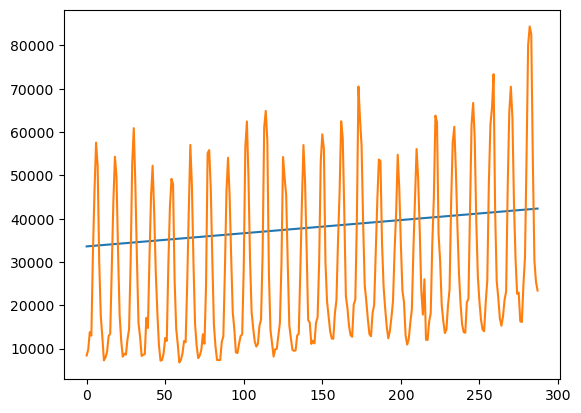

In [9]:
plt.plot(data)
plt.show()


We perform the Q-test to check whether there is autocorrelation in the series to use an ARIMA model.

In [12]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(data["TouristNumber"].values)


,lb_stat,lb_pvalue
1,192.180851,1.062459e-43
2,243.347584,1.437949e-53
3,243.435422,1.720184e-52
4,282.414013,6.721979e-60
5,374.506023,9.237014e-79
6,488.136851,3.019824e-102
7,576.349319,3.010715e-120
8,611.975920,6.227934e-127
9,612.088155,5.325059e-126
10,656.970266,1.076157e-134


Since the p-value is very small we conclude that there is autocorrelation in the series.
We can observe from the plot that there is a light trend in the series, so we use differencing to remove the trend.

In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def test_stationarity(timeseries):

    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    #plotting rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()

    #Dickey_Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

    #kpss test:
    print('Results of kpss Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

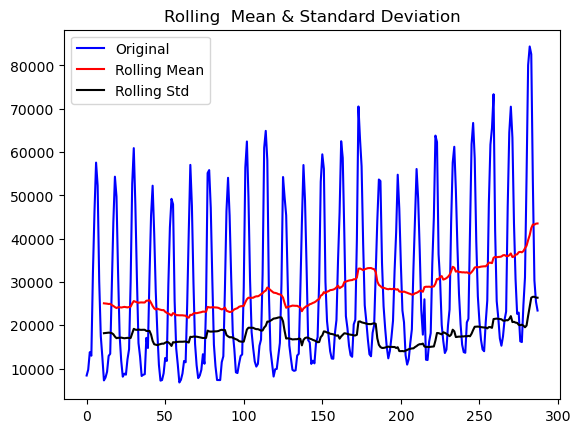

Results of Dickey-Fuller Test:
Test Statistic                   1.247470
p-value                          0.996298
#Lags Used                      13.000000
Number of Observations Used    274.000000
Critical Value (1%)             -3.454444
Critical Value (5%)             -2.872147
Critical Value (10%)            -2.572422
dtype: float64
Results of kpss Test:
Test Statistic           0.976983
p-value                  0.010000
#Lags Used               7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/var/folders/wg/0ry_2kxj1cjg6v6gw1kzvv_40000gn/T/ipykernel_40423/3422096425.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [16]:
test_stationarity(pd.Series(data["TouristNumber"].values))


We apply the diff:

In [17]:
from statsmodels.tsa.statespace.tools import diff
diff(data)


,Date,TouristNumber
1,31.0,1353.0
2,29.0,4038.0
3,31.0,-818.0
4,30.0,19203.0
5,31.0,14193.0
...,...,...
283,31.0,-1788.0
284,31.0,-29121.0
285,30.0,-23111.0
286,31.0,-4925.0


Check for stationarity

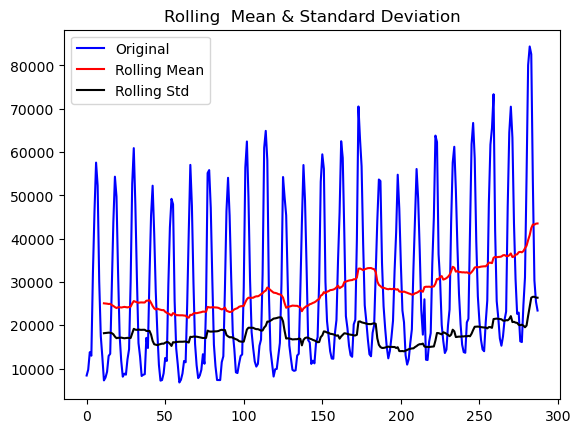

Results of Dickey-Fuller Test:
Test Statistic                   1.247470
p-value                          0.996298
#Lags Used                      13.000000
Number of Observations Used    274.000000
Critical Value (1%)             -3.454444
Critical Value (5%)             -2.872147
Critical Value (10%)            -2.572422
dtype: float64
Results of kpss Test:
Test Statistic           0.976983
p-value                  0.010000
#Lags Used               7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/var/folders/wg/0ry_2kxj1cjg6v6gw1kzvv_40000gn/T/ipykernel_40423/3422096425.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [19]:
test_stationarity(data["TouristNumber"])


Apply the Q-test again

In [21]:
acorr_ljungbox(data["TouristNumber"].values)


,lb_stat,lb_pvalue
1,192.180851,1.062459e-43
2,243.347584,1.437949e-53
3,243.435422,1.720184e-52
4,282.414013,6.721979e-60
5,374.506023,9.237014e-79
6,488.136851,3.019824e-102
7,576.349319,3.010715e-120
8,611.975920,6.227934e-127
9,612.088155,5.325059e-126
10,656.970266,1.076157e-134


Now, let's check the ACF:

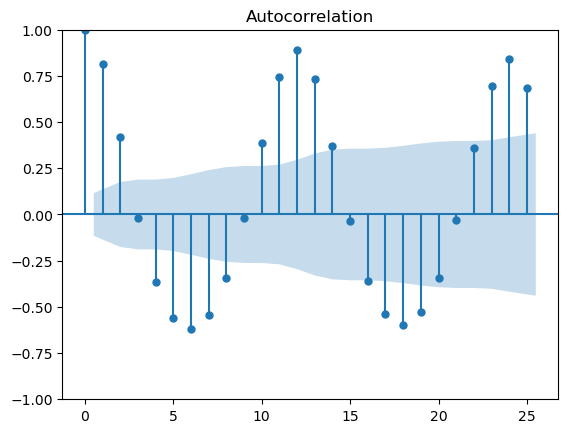

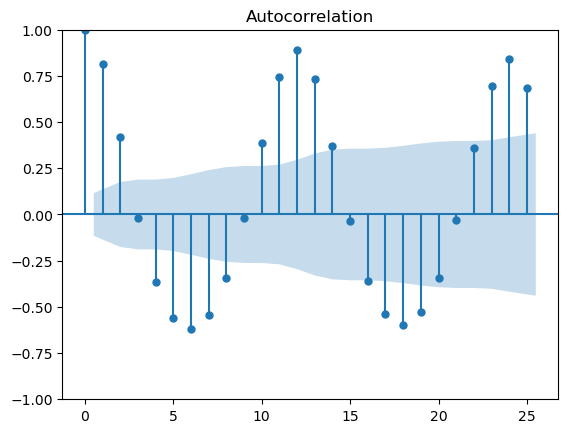

In [23]:
plot_acf(data["TouristNumber"])


Let's check the PACF

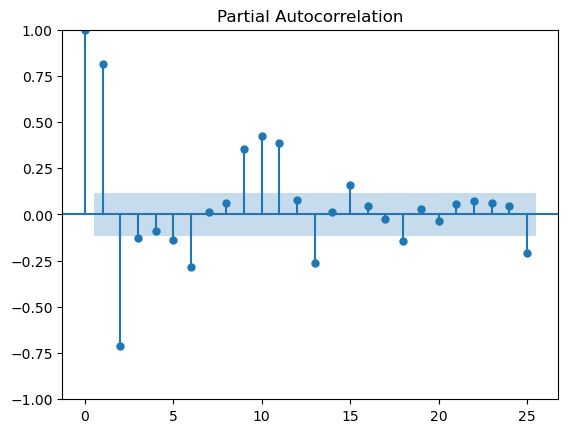

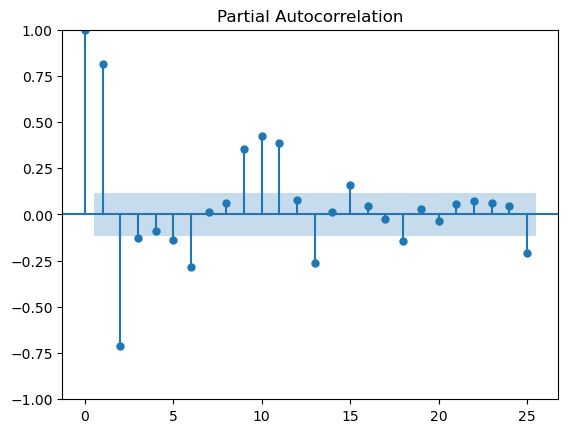

In [25]:
plot_pacf(data["TouristNumber"])


First model: (once you set d=1, you apply the model to the original series)

In [13]:
import statsmodels.api as sm





Let's check the residuals:

Q-test on residuals:

Let's calculate SSE:

Let's try a second model:

Check the residuals, calculate Q-box test p-value

Calculate SSE

Let's try a third model:

Residuals

SSE

Let's consider the model ARIMA(1,1,1) which is the one with the lowest AIC:

## AutoARIMA

It is possible to use an automatic procedure to fine the best model. The procedure tests the series to find the order of differencing and fits the series with several models.




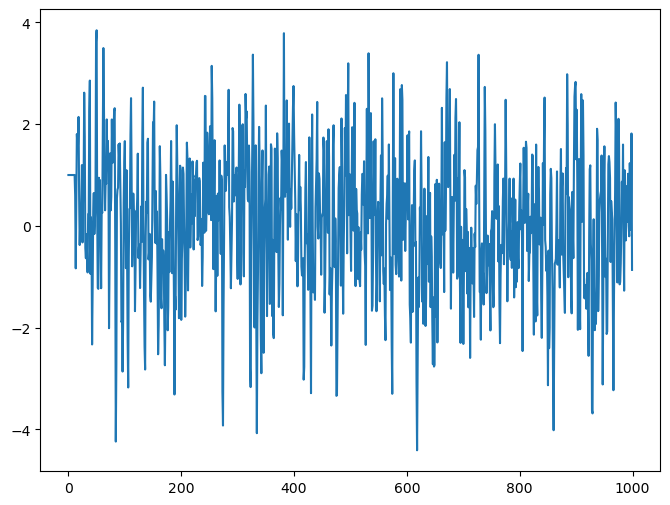

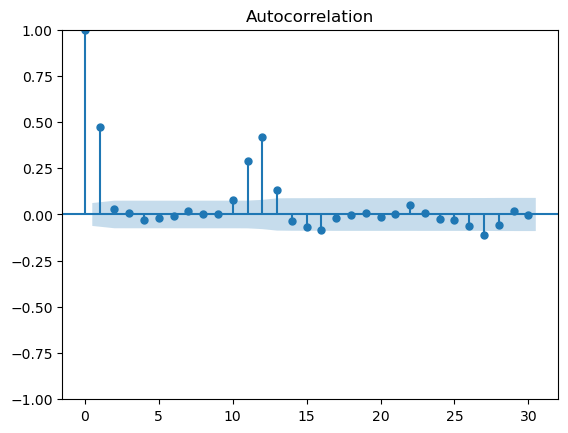

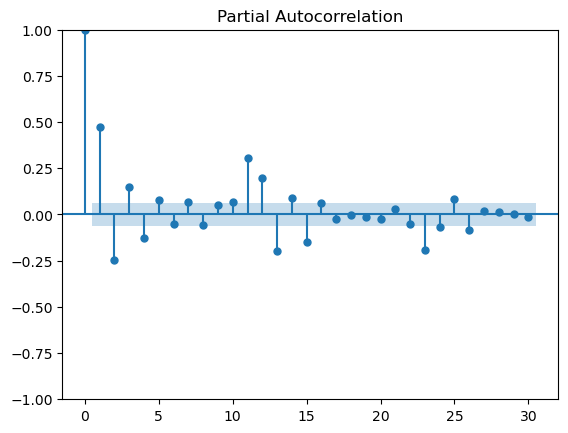

In [ ]:
n = 1000
x = np.zeros(n)
z= np.zeros(n)

z = np.random.normal(0,1,n)

x[0:12]=1

for i in range(12,n):
    x[i]=z[i]+0.7*z[i-1]+0.6*z[i-12]+0.42*z[i-13]

fig,ax = plt.subplots(figsize=(8,6))
ax.plot(x)
plot_acf(x)
plot_pacf(x)
plt.show()

In [27]:
dataDos = pd.read_csv("data.csv")
data.reset_index(inplace=True)
data['date']=data['Date'].astype('str')



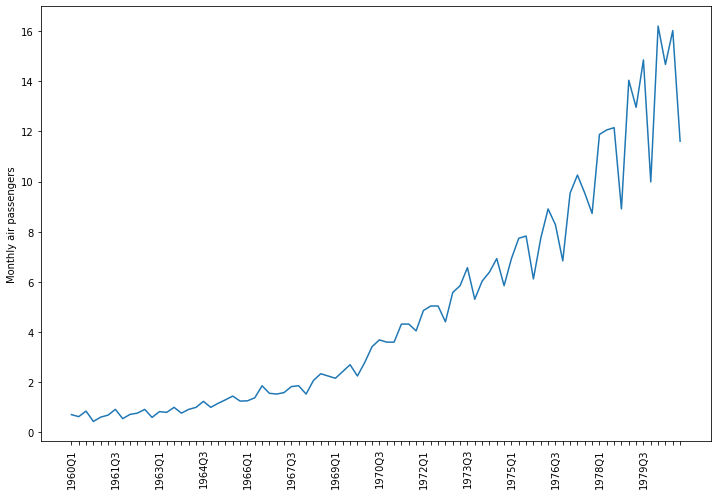

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(data['date'],data['data'])
plt.xticks(rotation = 90,size=10)
plt.ylabel('Monthly air passengers')
every_nth = 6
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()

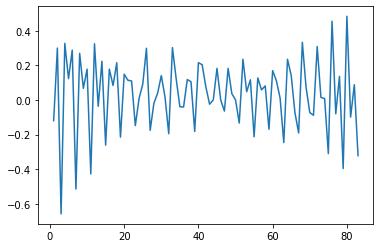

In [ ]:
from statsmodels.tsa.statespace.tools import diff
tslog = np.log(data['data'])
logret= diff(tslog)
plt.plot(logret)
plt.show()

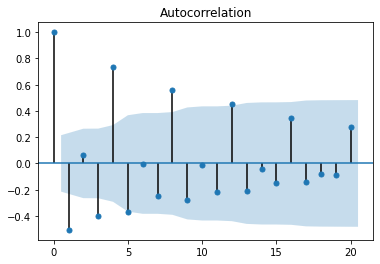

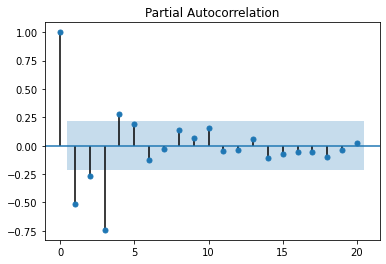

In [ ]:
plot_acf(logret)
plot_pacf(logret)
plt.show()

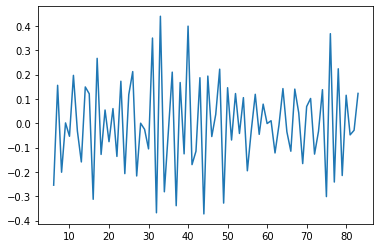

In [ ]:
slogret= diff(diff(tslog),k_seasonal_diff=1,seasonal_periods=4)
plt.plot(slogret)
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
m = int(np.log(data.shape[0]))

acorr_ljungbox(slogret, lags=[m])

(array([47.49569559]), array([1.20220404e-09]))

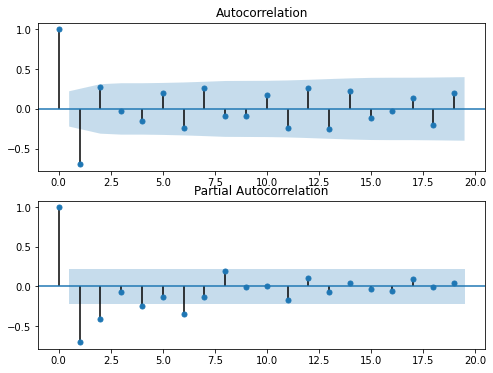

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(8,6))
plot_acf(slogret,ax=ax[0])
plot_pacf(slogret,ax=ax[1])
plt.show()

In [ ]:
import statsmodels.api as sm
pp = []
qq = []
PP = []
QQ = []
aic = []
lb = []
sse = []
for p in range(0,2):
    for q in range(0,2):
        for P in range(0,2):
            for Q in range(0,2):
                model=sm.tsa.statespace.SARIMAX(np.log(data['data']),order=(p, 1, q),seasonal_order=(P,1,Q,4))
                res = model.fit()
                pp.append(p)
                qq.append(q)
                PP.append(P)
                QQ.append(Q)
                aic.append(res.aic)
                lb.append(acorr_ljungbox(res.resid, lags=[m]))
                sse.append((res.resid**2).sum())

resdf = pd.DataFrame()
resdf['p']=pp
resdf['q']=qq
resdf['PP']=PP
resdf['QQ']=QQ
resdf['AIC']=aic
resdf['lb-p-value']=lb
resdf['sse']=sse

In [ ]:
resdf

In [ ]:
model=sm.tsa.statespace.SARIMAX(np.log(data['data']),order=(0, 1, 1),seasonal_order=(1,1,0,4))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                              data   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 4)   Log Likelihood                  78.457
Date:                           Tue, 12 Apr 2022   AIC                           -150.914
Time:                                   17:41:51   BIC                           -143.805
Sample:                                        0   HQIC                          -148.066
                                            - 84                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6797      0.096     -7.107      0.000      -0.867      -0.492
ar.S.L4       -0.3219      0.108     -2.970      0.003      -0.534      -0.110
sigma2         0.0079      0.002      5.150      0.000       0.005       0.011
===================================================================================
Ljung-Box (Q):                       36.29   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.64   Prob(JB):                         0.45
Heteroskedasticity (H):               0.45   Skew:                             0.08
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

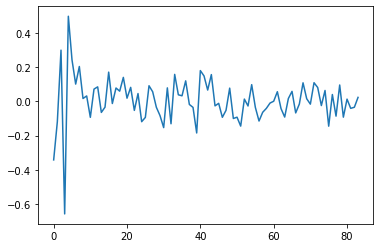

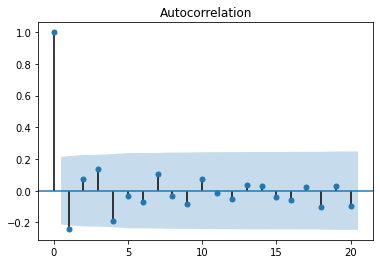

In [ ]:
plt.plot(res.resid)
plot_acf(res.resid)
plt.show()

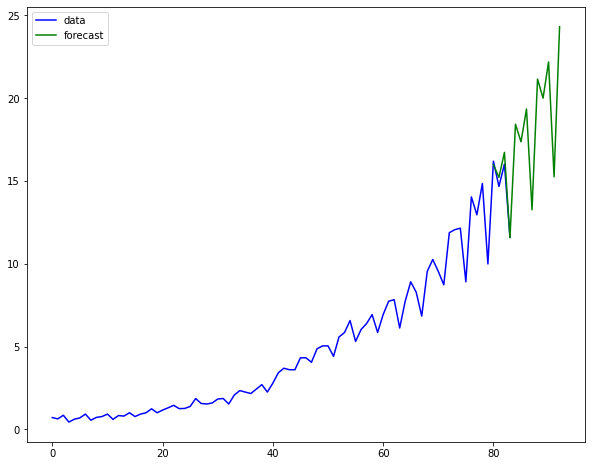

In [ ]:
import seaborn as sns
forecast=np.exp(res.predict(start=80,end=92,signal_only=True,dynamic=True))

fig,ax = plt.subplots(figsize=(10,8))
ax.plot(data.index,data['data'],label='data',color='blue')
ax.plot(forecast,label='forecast',color='green')
plt.legend()
plt.show()

In [ ]:
data2 = pd.read_csv('air_passangers.csv')
data2.reset_index(inplace=True)
data2['date']=data2['date'].astype('str')

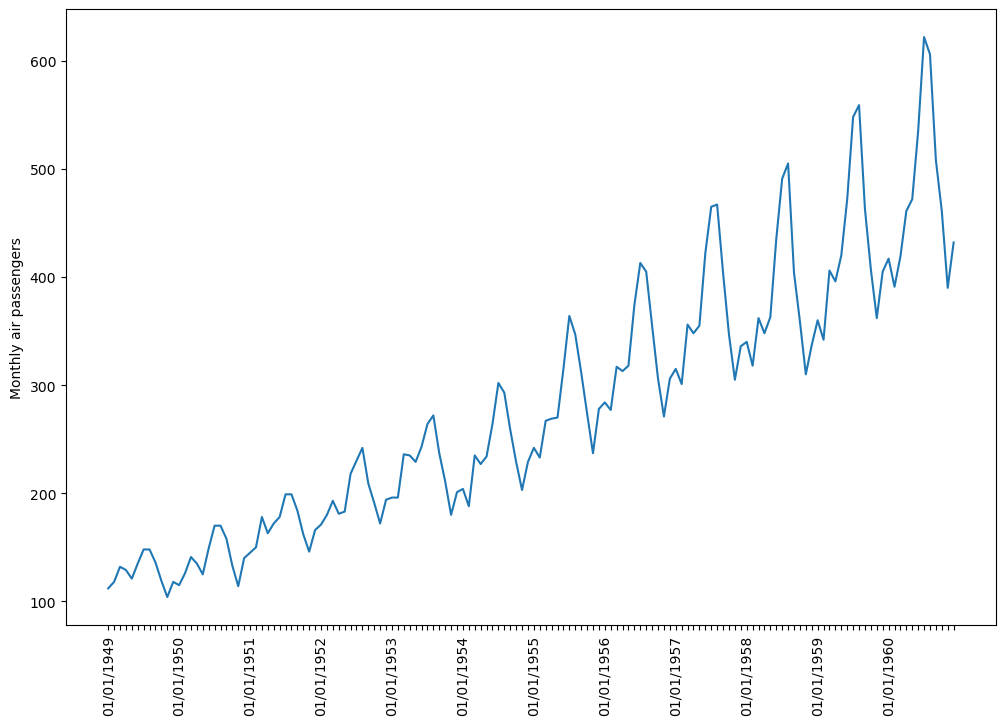

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(data2['date'],data2['data'])
plt.xticks(rotation = 90,size=10)
plt.ylabel('Monthly air passengers')
every_nth = 12
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()

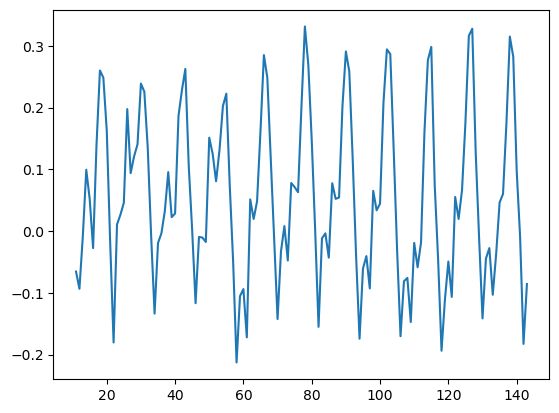

In [ ]:
tslog = np.log(data2['data'])
rollavg = tslog.rolling(12).mean()
tslogdiff = tslog - rollavg
tslogdiff.dropna(inplace = True)
plt.plot(tslogdiff)
plt.show()

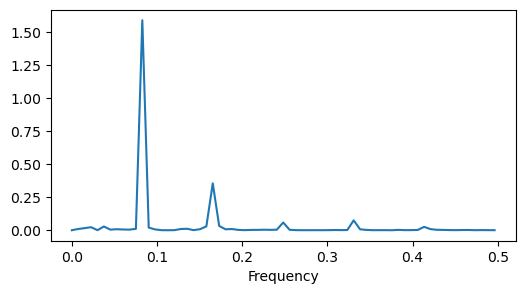

In [ ]:
from scipy import signal
f, Pxx = signal.periodogram(tslogdiff)
fig, ax = plt.subplots(figsize=(6,3))
plt.plot(f, Pxx)
plt.xlabel('Frequency')
plt.show()


In [ ]:
top_4_periods = {}

# get indices for 4 highest Pxx values
top4_freq_indices = np.flip(np.argsort(Pxx), 0)[0:4]


freqs = f[top4_freq_indices]

# use same indices to get powers as well
power = Pxx[top4_freq_indices]

# we are interested in period and it is calculated as 1/frequency
periods = 1 / np.array(freqs)

# populate dict with calculated values
top_4_periods['period1'] = periods[0]
top_4_periods['freq1'] = freqs[0]
top_4_periods['power1'] = power[0]

top_4_periods['period2'] = periods[1]
top_4_periods['freq2'] = freqs[1]
top_4_periods['power2'] = power[1]

top_4_periods['period3'] = periods[2]
top_4_periods['freq3'] = freqs[2]
top_4_periods['power3'] = power[2]

top_4_periods['period4'] = periods[3]
top_4_periods['freq4'] = freqs[3]
top_4_periods['power4'] = power[3]


In [ ]:
top_4_periods


{'period1': 12.090909090909092,
 'freq1': 0.08270676691729323,
 'power1': 1.5872570162369508,
 'period2': 6.045454545454546,
 'freq2': 0.16541353383458646,
 'power2': 0.3541930224044221,
 'period3': 3.022727272727273,
 'freq3': 0.3308270676691729,
 'power3': 0.07463805391631227,
 'period4': 4.03030303030303,
 'freq4': 0.24812030075187969,
 'power4': 0.058300601806708166}

In [ ]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    freqencies, spectrum = periodogram(ts)
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1/12, 1/6, 1/4, 1/3, 1/2])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "3 months",
            "Bimonthly (6)",


        ],
        rotation=90,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


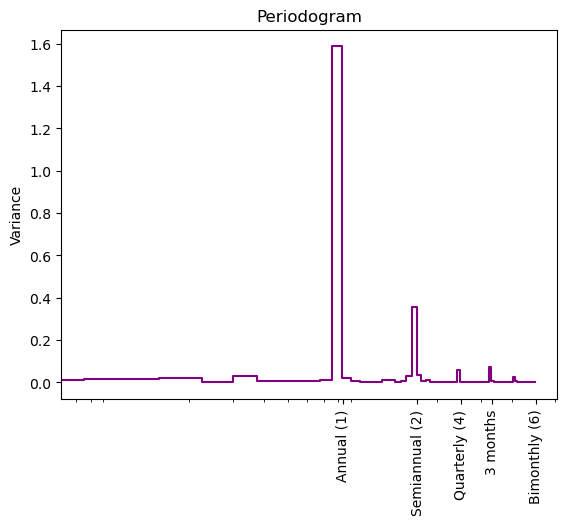

In [ ]:
plot_periodogram(tslogdiff)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data2['data'], model='multiplicable',period=12)

<Axes: >

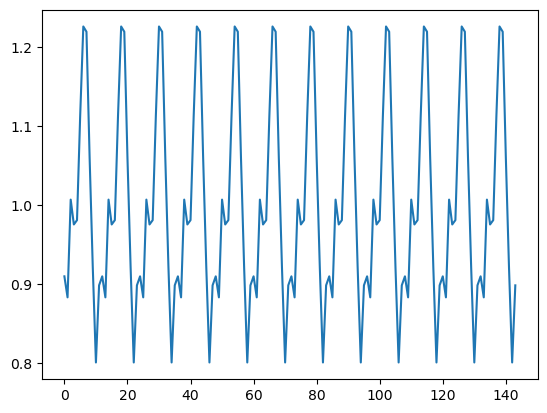

In [ ]:
result.seasonal.plot()

<Axes: >

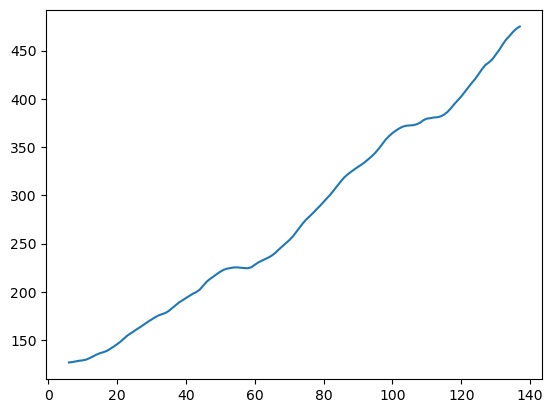

In [ ]:
result.trend.plot()


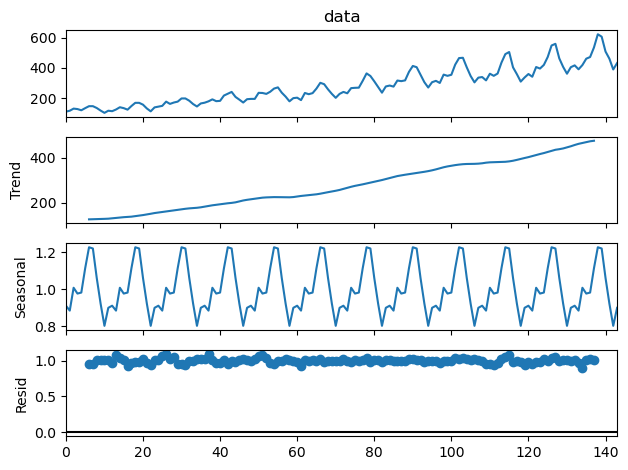

In [ ]:
result.plot()
plt.show()